# Project 1 Loan Prediction Dataset
# Graph Analysis Notebook
## Ryan Rosiak and Grant Dawson
## 9/19/21

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Import
lp_dataframe = pd.read_csv('./Dataset/Training_Data.csv', header=0)
lp_dataframe.head(15)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [3]:
# Clean some of the data
# i.e. remove the id column from the original import
# and convert the income number to a float
del lp_dataframe['Id']
# lp_dataframe['Income'] = lp_dataframe['Income'] * (1/100)
lp_dataframe.head(15)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [4]:
# Now to print out some of the attributes
# Dimensions of dataset
lp_dataframe.shape

(252000, 12)

### Current Questions Proposed in Paper for Reference:
#### 1. Does more experience mean more income?
#### 2. Does location mean more income?
#### 3. Can you make a model to guess risk factor? Can prediction models help?
#### 4. Are there certain jobs that reside in certain places?
#### 5. Do certain places have more renting than others?
#### 6. Do certain places have higher loan acceptance?
#### 7. Do certain places have less people without cars?
#### 8. Does where you live affect the loan process?
#### 9. What is the difference in being considered risk/non-risk as it relates to being married/single?
#### 10. Do older individuals have more professional experience?
#### 11. What professions make the most money?
#### 12. Do people younger than 22 generally have relatively less job experience than people older (out of college)?
#### 13. Does professional experience determine car ownership?
#### 14. Does marital status have an affect your living situation?

<br></br>
### Graph for Question 10:

### Q: 10. Do older individuals have more professional experience?

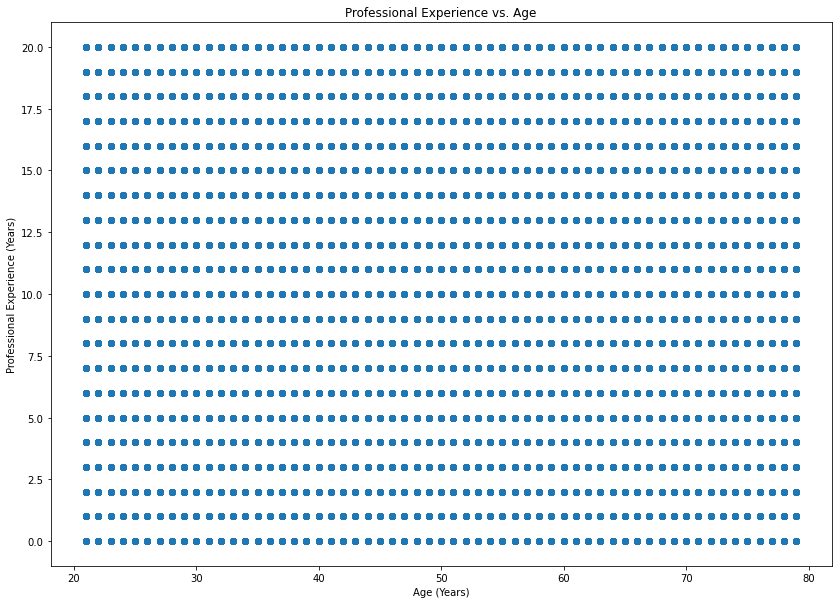

In [5]:
# Creating a scatter plot for this scenario
y_axis = lp_dataframe[['Experience']]
x_axis = lp_dataframe[['Age']]
plt.figure(figsize=(14,10))
plt.scatter(x_axis, y_axis)
plt.title('Professional Experience vs. Age')
plt.ylabel('Professional Experience (Years)')
plt.xlabel('Age (Years)')
plt.show()

<br></br>
### Graph for Question 9:

### Q: What is the difference in being considered risk/non-risk as it relates to being married/single?

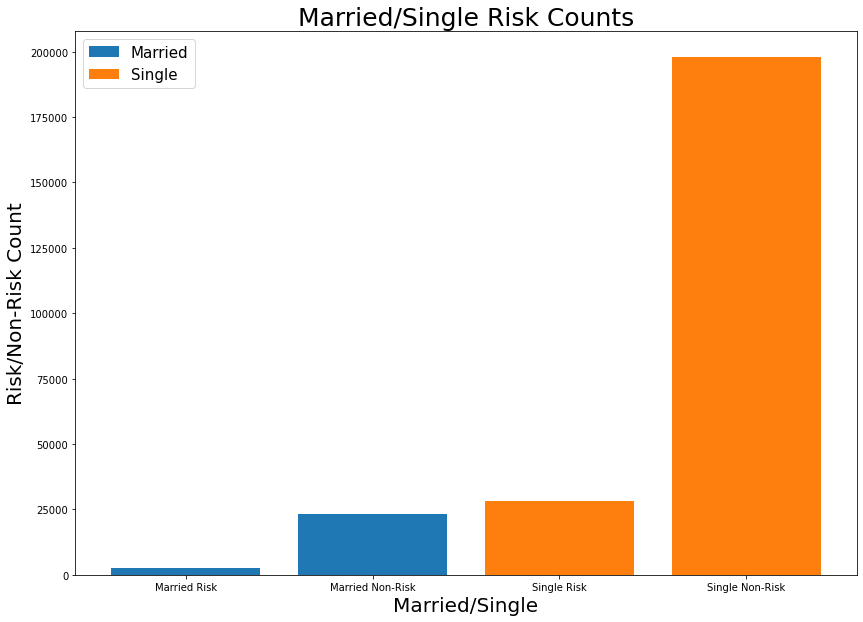

In [6]:
list_data = lp_dataframe[['Married/Single', 'Risk_Flag']]
result1 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 1)].count()
result2 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 0)].count()
result3 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 1)].count()
result4 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 0)].count()
plt.figure(figsize=(14,10))
plt.bar(['Married Risk', 'Married Non-Risk'],
        [result1[0], result2[0]])
plt.bar(['Single Risk', 'Single Non-Risk'],
       [result3[0], result4[0]])
plt.title('Married/Single Risk Counts', fontsize=25)
plt.ylabel('Risk/Non-Risk Count', fontsize=20)
plt.xlabel('Married/Single', fontsize=20)
plt.legend(['Married', 'Single'], fontsize=15)
plt.show()

<br></br>
### Graph for Question 11:

### Q: What professions make the most money?

In [7]:
sub_data_lp = lp_dataframe[['Income', 'Profession']]
max_income_professions = sub_data_lp.groupby(by='Profession').max().sort_values(by='Income', ascending=False)
print('Top 10 Highest Paid Professions (Max)')
print(max_income_professions[:10])
mean_income_professions = sub_data_lp.groupby(by='Profession').mean().sort_values(by='Income', ascending=False)
print('\nTop 10 Highest Paid Professions (Avg)')
print(mean_income_professions[:10])

Top 10 Highest Paid Professions (Max)
                             Income
Profession                         
Police_officer              9999938
Librarian                   9999400
Drafter                     9999180
Aviator                     9998280
Secretary                   9998070
Designer                    9996946
Statistician                9996861
Computer_hardware_engineer  9996192
Surgeon                     9995445
Biomedical_Engineer         9994932

Top 10 Highest Paid Professions (Avg)
                           Income
Profession                       
Petroleum_Engineer   5.443310e+06
Psychologist         5.357795e+06
Designer             5.336802e+06
Scientist            5.282710e+06
Surgeon              5.235359e+06
Comedian             5.199539e+06
Chemical_engineer    5.189805e+06
Mechanical_engineer  5.175032e+06
Artist               5.164765e+06
Financial_Analyst    5.145753e+06


<br></br>
### Graph for Question 12:

### Q: Do people younger than 22 generally have relatively less job experience than people older (out of college)?

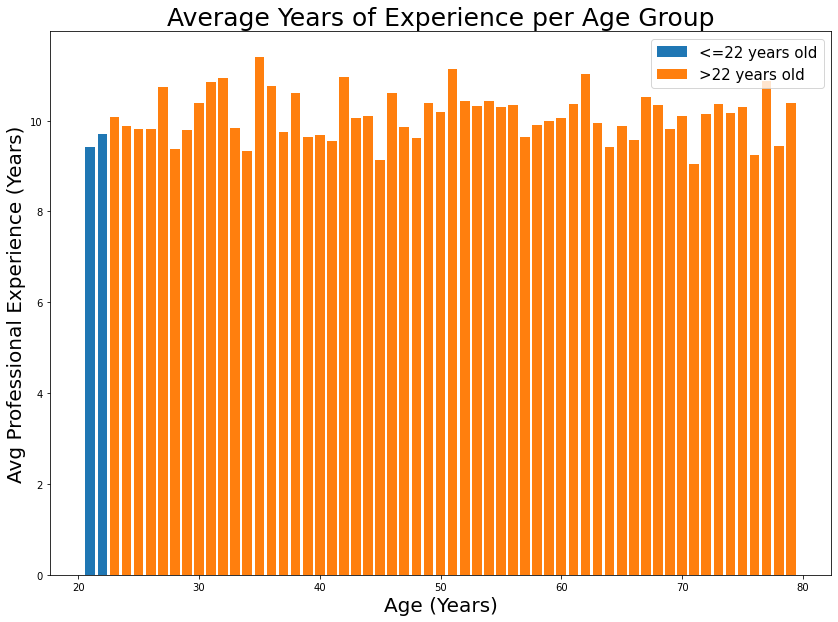

In [8]:
sub_data_lp = lp_dataframe[['Age', 'Experience']]
result_cond_young = sub_data_lp.loc[sub_data_lp['Age'] <= 22].groupby(by='Age').mean()
result_cond_old = sub_data_lp.loc[sub_data_lp['Age'] > 22].groupby(by='Age').mean()
x_axis1 = result_cond_young.reset_index()['Age']
y_axis1 = result_cond_young.reset_index()['Experience']
x_axis2 = result_cond_old.reset_index()['Age']
y_axis2 = result_cond_old.reset_index()['Experience']
plt.figure(figsize=(14,10))
plt.bar(x_axis1, y_axis1)
plt.bar(x_axis2, y_axis2)
plt.title('Average Years of Experience per Age Group', fontsize=25)
plt.xlabel('Age (Years)', fontsize=20)
plt.ylabel('Avg Professional Experience (Years)', fontsize=20)
plt.legend(['<=22 years old', '>22 years old'], fontsize=15)
plt.show()

<br></br>
### Graph for Question 13:

### Q: Does professional experience determine car ownership?

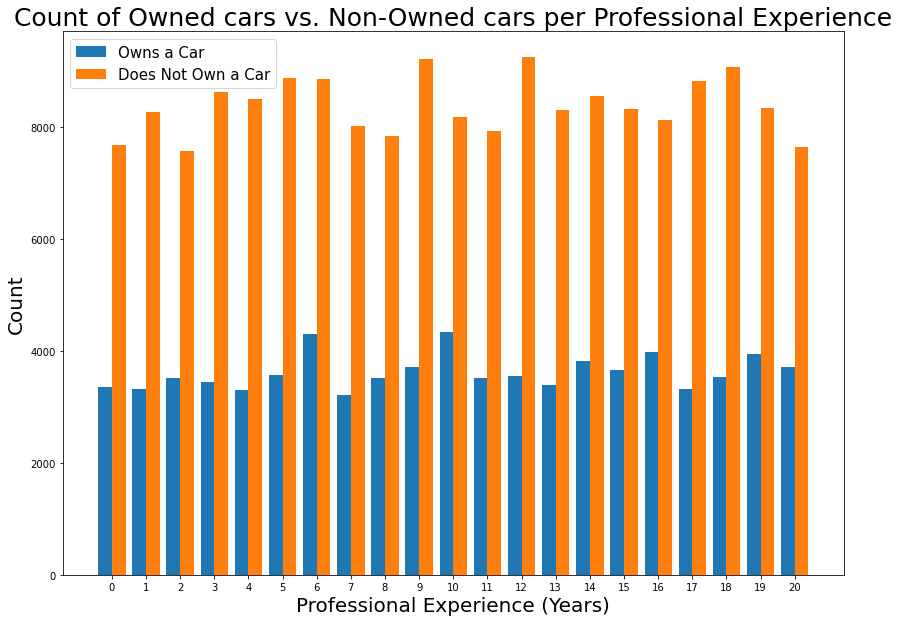

In [9]:
sub_data_lp = lp_dataframe[['Experience', 'Car_Ownership']]

grouped_own_car = sub_data_lp.loc[sub_data_lp['Car_Ownership'] == 'yes'].groupby(by='Experience').count()
grouped_own_car = grouped_own_car.reset_index()
grouped_not_own_car = sub_data_lp.loc[sub_data_lp['Car_Ownership'] == 'no'].groupby(by='Experience').count()
grouped_not_own_car = grouped_not_own_car.reset_index()

x_axis = grouped_own_car['Experience']
y_axis = grouped_own_car['Car_Ownership']
x_axis2 = grouped_not_own_car['Experience']
y_axis2 = grouped_not_own_car['Car_Ownership']

plt.figure(figsize=(14,10))
plt.bar(x_axis, y_axis, width=0.4)
plt.bar(x_axis2 + 0.4, y_axis2, width=0.4)
plt.xticks(np.arange(0, 21, 1.0) + 0.4 / 2, np.arange(0, 21, 1))

plt.title('Count of Owned cars vs. Non-Owned cars per Professional Experience', fontsize=25)
plt.xlabel('Professional Experience (Years)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(['Owns a Car', 'Does Not Own a Car'], fontsize=15)
plt.show()

<br></br>
### Graph for Question 14:

### Q: Does marital status have an affect your living situation?

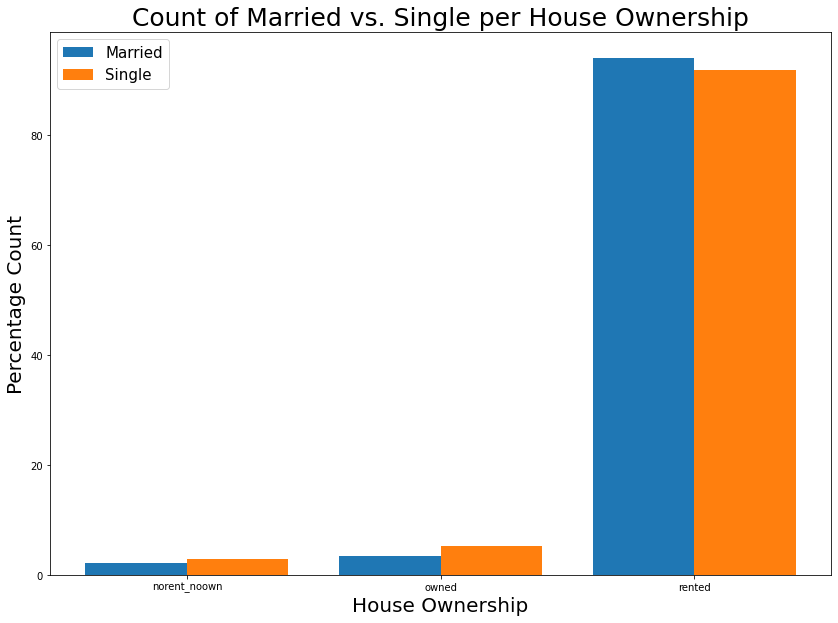

In [37]:
sub_data_lp = lp_dataframe[['Married/Single', 'House_Ownership']]
grouped_married = sub_data_lp.loc[sub_data_lp['Married/Single'] == 'married'].groupby(by='House_Ownership').count()
# Normalize
grouped_married['Married/Single'] = grouped_married['Married/Single'] / sub_data_lp.loc[sub_data_lp['Married/Single'] == 'married'].count()[0]
grouped_married = grouped_married.reset_index()
grouped_not_married = sub_data_lp.loc[sub_data_lp['Married/Single'] == 'single'].groupby(by='House_Ownership').count()
# Normalize
grouped_not_married['Married/Single'] = grouped_not_married['Married/Single'] / sub_data_lp.loc[sub_data_lp['Married/Single'] == 'single'].count()[0]
grouped_not_married = grouped_not_married.reset_index()


x_axis1 = grouped_married['House_Ownership']
y_axis1 = grouped_married['Married/Single'] * 100
x_axis2 = grouped_not_married['House_Ownership']
y_axis2 = grouped_not_married['Married/Single'] * 100

plt.figure(figsize=(14,10))
plt.bar(x_axis1, y_axis1, width=0.4)
plt.bar(np.arange(0, 3, 1.0) + 0.4, y_axis2, width=0.4)
plt.xticks(np.arange(0, 3, 1.0) + 0.4 / 2, ['norent_noown', 'owned', 'rented'])

plt.title('Count of Married vs. Single per House Ownership', fontsize=25)
plt.xlabel('House Ownership', fontsize=20)
plt.ylabel('Percentage Count', fontsize=20)
plt.legend(['Married', 'Single'], fontsize=15)
plt.show()

In [60]:
# Finding the correlation coefficient of House Ownership vs. Married/Single
sub_data_lp.loc[sub_data_lp['House_Ownership'] == 'norent_noown', 'House_Ownership'] = 0
sub_data_lp.loc[sub_data_lp['House_Ownership'] == 'owned', 'House_Ownership'] = 1
sub_data_lp.loc[sub_data_lp['House_Ownership'] == 'rented', 'House_Ownership'] = 2

sub_data_lp.loc[sub_data_lp['Married/Single'] == 'married', 'Married/Single'] = 0
sub_data_lp.loc[sub_data_lp['Married/Single'] == 'single', 'Married/Single'] = 1

married_single_list = list(sub_data_lp['Married/Single'])
house_ownership_list = list(sub_data_lp['House_Ownership'])

married_single_list_series = pd.Series(married_single_list)
house_ownership_list_series = pd.Series(house_ownership_list)

corr_value_married = married_single_list_series.corr(house_ownership_list_series, method='pearson')
print('Correlation Coefficient: %f' % corr_value_married)

<ipython-input-60-2b0f98dc0240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_lp.loc[sub_data_lp['House_Ownership'] == 'norent_noown', 'House_Ownership'] = 0
<ipython-input-60-2b0f98dc0240>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_lp.loc[sub_data_lp['House_Ownership'] == 'owned', 'House_Ownership'] = 1
<ipython-input-60-2b0f98dc0240>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_lp.loc[sub_data_

Correlation Coefficient: 0.023527
